In [28]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import qutip as q
import time

In [29]:
# Funcion que me devuelve el operador de espin en una cierta componente y el operador de spin total
def spin_operator(N, component):
    """
    N: int (numero de qubits)
    Component: str (componente del momento angular, 'x', 'y', 'z')
    returns Qobj
    """
    if component == 'x':
        op = q.sigmax()
    elif component == 'y':
        op = q.sigmay()
    elif component == 'z':
        op = q.sigmaz()
    else: 
        raise ValueError('La componente tiene que se x, y, o z')
    
    # Construimos los operadores
    total_operator = 0
    indv_operators = []
    for i in range(N):
        operators = [q.qeye(2) for _ in range(N)]
        operators[i] = op
        indv_operators.append(q.tensor(operators))
        total_operator += q.tensor(operators)
    
    return total_operator, indv_operators


# Funcion que me da el hamiltoniano de Ising cuantico y su operador de salto
def ising(params, N):
    # Parametros
    om = params[0]
    v = params[1]
    a = params[2]
    gam = params[3]
    
    # Sacamos los terminos
    spin_z = spin_operator(N, component = 'z')[1]
    todo_x = spin_operator(N, component = 'x')[0]
    spin_x = spin_operator(N, component = 'x')[1]
    spin_y = spin_operator(N, component = 'y')[1]
    
    list_J = []
    suma = 0
    for i in range(len(spin_z)):
        list_J.append((np.sqrt(gam)/2)*(spin_x[i] - 1.j*spin_y[i]))
        for j in range(len(spin_z)):
            if(i < j):
                suma += (spin_z[i]*spin_z[j])/(np.abs(i-j)**a)
                
    H = om*todo_x + v*suma
    return H, list_J

# Funcion que me permite obtener la matriz densidad de la que hablan en el articulo
def densidad(N):
    return q.basis(int(2**N), 0)*(q.basis(int(2**N), 0)).dag(), q.basis(int(2**N), 0)

# Funcion que me da el hamiltoniano y el operador de salto del modelo de Ising pero para a tendiendo a infinito
def ising_inf(params, N):
    # Parametros
    om = params[0]
    v = params[1]
    a = params[2]
    gam = params[3]
    
    # Sacamos los terminos
    spin_z = spin_operator(N, component = 'z')[1]
    todo_x = spin_operator(N, component = 'x')[0]
    spin_x = spin_operator(N, component = 'x')[1]
    spin_y = spin_operator(N, component = 'y')[1]
    
    list_J = []
    suma = 0
    for i in range(len(spin_z)):
        list_J.append((np.sqrt(gam)/2)*(spin_x[i] - 1.j*spin_y[i]))
        for j in range(len(spin_z)):
            if(i < j):
                suma += spin_z[i]*spin_z[j]/np.abs(i-j)**a
                
    H = om*todo_x
    return H, list_J

0
0 4.0 0.1
[-1.01609028e-14-2.71438905e-15j -5.00000000e-01+1.05698870e-15j
 -5.00000000e-01-1.20504982e-14j]
1 3.5666666666666664 0.1
[ 7.54581071e-15-4.37571842e-15j -5.00000000e-01-2.01113714e-15j
 -5.00000000e-01+1.01940103e-14j]
2 3.1333333333333333 0.1
[ 6.82889996e-15-4.04562854e-16j -5.00000000e-01-3.43215040e-15j
 -5.00000000e-01+3.33717429e-15j]
3 2.7 0.1
[ 7.0146039e-15+8.49344247e-16j -5.0000000e-01-5.39320390e-15j
 -5.0000000e-01+7.07031954e-15j]
4 2.2666666666666666 0.1
[ 1.46360525e-15-2.88246391e-15j -5.00000000e-01+9.88301412e-15j
 -5.00000000e-01-7.27067671e-15j]
5 1.833333333333333 0.1
[ 5.01472524e-15+1.98967846e-15j -5.00000000e-01+5.27355937e-15j
 -5.00000000e-01-1.73623090e-15j]
6 1.4 0.1
[ 1.13852106e-14-4.47960221e-15j -5.00000000e-01-7.15105872e-16j
 -5.00000000e-01+8.42511133e-16j]
7 0.9666666666666668 0.1
[-2.18698012e-15-2.19073605e-15j -5.00000000e-01-1.52653587e-16j
 -5.00000000e-01+6.66133969e-15j]
8 0.5333333333333332 0.1
[ 1.07755112e-15-1.20608041e-1

[ 1.46360525e-15-2.88246391e-15j -5.00000000e-01+9.88301412e-15j
 -5.00000000e-01-7.27067671e-15j]
5 1.833333333333333 4.7
[ 5.01472524e-15+1.98967846e-15j -5.00000000e-01+5.27355937e-15j
 -5.00000000e-01-1.73623090e-15j]
6 1.4 4.7
[ 1.13852106e-14-4.47960221e-15j -5.00000000e-01-7.15105872e-16j
 -5.00000000e-01+8.42511133e-16j]
7 0.9666666666666668 4.7
[-2.18698012e-15-2.19073605e-15j -5.00000000e-01-1.52653587e-16j
 -5.00000000e-01+6.66133969e-15j]
8 0.5333333333333332 4.7
[ 1.07755112e-15-1.20608041e-15j -5.00000000e-01+4.80518403e-16j
 -5.00000000e-01+1.31478975e-15j]
9 0.1 4.7
[ 2.78702472e-15+6.94112143e-17j -5.00000000e-01-2.63854998e-16j
 -5.00000000e-01+3.49819062e-16j]
7
0 4.0 5.466666666666667
[-1.01609028e-14-2.71438905e-15j -5.00000000e-01+1.05698870e-15j
 -5.00000000e-01-1.20504982e-14j]
1 3.5666666666666664 5.466666666666667
[ 7.54581071e-15-4.37571842e-15j -5.00000000e-01-2.01113714e-15j
 -5.00000000e-01+1.01940103e-14j]
2 3.1333333333333333 5.466666666666667
[ 6.828899

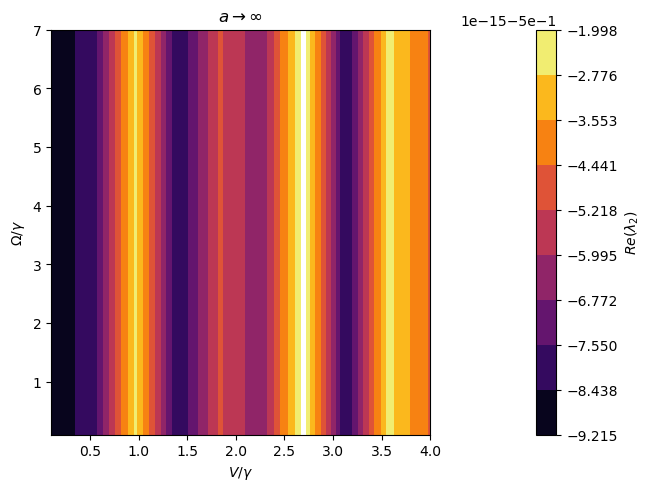

Tiempo: 1081.38525724411


In [26]:
inicio = time.time()

# Elegimos los parametros queno van a cambiar
gam = 1
a = 10
N = 5
om_values = np.linspace(4, 0.1, 10)
v_values = np.linspace(0.1, 7, 10)
X, Y = np.meshgrid(om_values, v_values)
Z = np.zeros_like(X, dtype = complex)
d0, ini = densidad(N)
A_total =(2*np.pi**2)/(0.3**2)
# Recorremos los valores de los parametros
for i in range(X.shape[0]):
    print(i)
    for j in range(X.shape[1]):
        print(j, X[i, j], Y[i, j])
        params = [X[i, j]*gam, Y[i, j]*gam, a, gam]
        H, list_J = ising_inf(params, N)
        L = q.liouvillian(H, list_J)
        todoh = (L.dag()).eigenstates(sparse = False, sort = 'high', eigvals = N - 2, maxiter = 1e7)
        vals, vects = todoh
        Z[i, j] = vals[1]
        print(vals)
        #Z[i, j] = sorted(vals, key = np.real)[1]
        
# Representamos 
fig1, ax2 = plt.subplots(layout='constrained')
#CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone)
CS = ax2.contourf(X, Y, np.real(Z), 10, cmap = 'inferno')
#CS = ax2.contourf(X, Y, Z, 10, cmap = 'viridis')
# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title(r'$a \rightarrow \infty$')
ax2.set_xlabel(r'$V / \gamma$')
ax2.set_ylabel(r'$\Omega / \gamma$')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r'$Re(\lambda_2)$')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)
    
plt.show()

fin = time.time()
print('Tiempo: ' + str(fin-inicio))

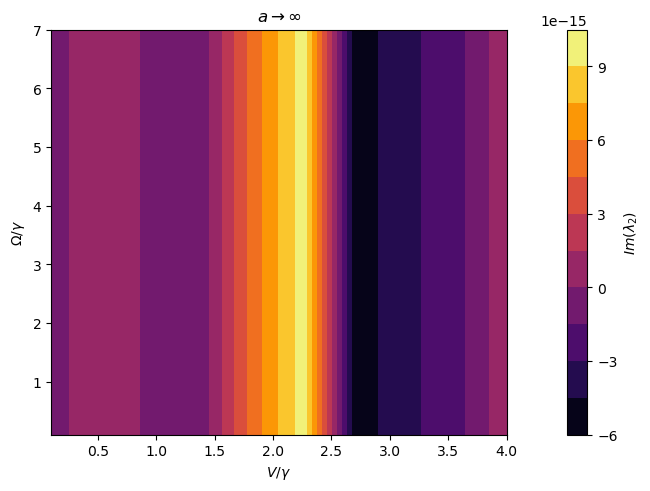

In [27]:
# Representamos
Z_im = np.zeros_like(Z)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z_im[i, j] = np.imag(Z[i, j])
fig1, ax2 = plt.subplots(layout='constrained')
#CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone)
CS = ax2.contourf(X, Y, Z_im, 10, cmap = 'inferno')
#CS = ax2.contourf(X, Y, Z, 10, cmap = 'viridis')
# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title(r'$a \rightarrow \infty$')
ax2.set_xlabel(r'$V / \gamma$')
ax2.set_ylabel(r'$\Omega / \gamma$')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r'$Im(\lambda_2)$')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)
    
plt.show()

In [21]:
Z

array([[-0.50021025, -0.50025627, -0.50031692, -0.50039633, -0.50049366,
        -0.50057444, -0.50039804, -0.49821916, -0.48123932, -0.52574264],
       [-0.51620718, -0.5196763 , -0.52393917, -0.52828847, -0.5278494 ,
        -0.49312107, -0.36413943, -0.38632209, -0.57611756, -0.50189781],
       [-0.55799101, -0.565504  , -0.56254835, -0.50345918, -0.35632125,
        -0.30114939, -0.36870069, -0.54460627, -0.51935091, -0.50056057],
       [-0.59268936, -0.52666462, -0.37842044, -0.28849367, -0.28458045,
        -0.34346853, -0.46846481, -0.53959793, -0.50830252, -0.50026216],
       [-0.41768227, -0.30552906, -0.26309467, -0.27171816, -0.32090099,
        -0.41581214, -0.56209257, -0.51955645, -0.50459184, -0.50015111],
       [-0.2708039 , -0.2487584 , -0.26051657, -0.30159512, -0.37630395,
        -0.48898958, -0.53607464, -0.51154139, -0.50291678, -0.50009811],
       [-0.23876129, -0.25074458, -0.28510648, -0.34524864, -0.43478126,
        -0.55000713, -0.52202154, -0.50761461

In [16]:
vals

array([-2.19052977e-14+5.82746102e-14j, -5.00031039e-01+2.91665514e+01j,
       -5.00031039e-01-2.91665514e+01j])